In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk import sent_tokenize, word_tokenize 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')

In [106]:
df = pd.read_csv("winemag-data-130k-v2.csv")

In [107]:
df = df.rename(columns= {'Unnamed: 0': 'col1'})
df = df.drop(['col1'], axis = 1)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [108]:
country_num =df['country'].unique()
df = df.dropna(subset=['price','points','country','province','variety'])
df = df[df['price']<200].reset_index()
df.head()

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
1,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
2,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
3,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
4,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [109]:
df1 = df.drop(df.columns[[0,3,7,8,9,10,11,12,13]], axis = 1)
df1.head()

,country,description,points,price,province
0,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro
1,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon
2,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan
3,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon
4,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain


In [6]:
l = list()
l = df1['country'].unique()
d = dict()
for i in range(len(l)):
    d[l[i]] = i 
d  

{'Portugal': 0,
 'US': 1,
 'Spain': 2,
 'Italy': 3,
 'France': 4,
 'Germany': 5,
 'Argentina': 6,
 'Chile': 7,
 'Australia': 8,
 'Austria': 9,
 'South Africa': 10,
 'New Zealand': 11,
 'Israel': 12,
 'Hungary': 13,
 'Greece': 14,
 'Romania': 15,
 'Mexico': 16,
 'Canada': 17,
 'Turkey': 18,
 'Czech Republic': 19,
 'Slovenia': 20,
 'Luxembourg': 21,
 'Croatia': 22,
 'Georgia': 23,
 'Uruguay': 24,
 'England': 25,
 'Lebanon': 26,
 'Serbia': 27,
 'Brazil': 28,
 'Moldova': 29,
 'Morocco': 30,
 'Peru': 31,
 'India': 32,
 'Bulgaria': 33,
 'Cyprus': 34,
 'Armenia': 35,
 'Switzerland': 36,
 'Bosnia and Herzegovina': 37,
 'Ukraine': 38,
 'Slovakia': 39,
 'Macedonia': 40,
 'China': 41}

In [7]:
df1['ct'] = np.zeros(120139)
for i, country in enumerate(df1['country']):
    df1['ct'][i] = d[country]

In [8]:
df1.head()

,country,description,points,price,province,ct
0,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,0.0
1,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,1.0
2,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,1.0
3,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,1.0
4,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,2.0


In [10]:
df1['points'].corr(df1['ct'])

-0.039172745257415986

In [11]:
l1 = list()
l1 = df['province'].unique()
d1 = dict()
for i in range(len(l1)):
    d1[l1[i]] = i 
d1  

{'Douro': 0,
 'Oregon': 1,
 'Michigan': 2,
 'Northern Spain': 3,
 'Sicily & Sardinia': 4,
 'Alsace': 5,
 'Rheinhessen': 6,
 'California': 7,
 'Mosel': 8,
 'Other': 9,
 'Mendoza Province': 10,
 'Virginia': 11,
 'Colchagua Valley': 12,
 'Southern Italy': 13,
 'Beaujolais': 14,
 'Maule Valley': 15,
 'Bordeaux': 16,
 'Maipo Valley': 17,
 'Washington': 18,
 'Central Italy': 19,
 'Champagne': 20,
 'Burgundy': 21,
 'South Australia': 22,
 'Rapel Valley': 23,
 'Galicia': 24,
 'France Other': 25,
 'Tuscany': 26,
 'Burgenland': 27,
 'New York': 28,
 'Leyda Valley': 29,
 'Piedmont': 30,
 'Stellenbosch': 31,
 'Simonsberg-Stellenbosch': 32,
 'Alentejano': 33,
 'Central Spain': 34,
 'Southwest France': 35,
 'Aconcagua Valley': 36,
 'Loncomilla Valley': 37,
 'Marlborough': 38,
 'Northeastern Italy': 39,
 'Casablanca Valley': 40,
 'Veneto': 41,
 'Western Cape': 42,
 'Judean Hills': 43,
 'Alentejo': 44,
 'Coastal Region': 45,
 'Rhône Valley': 46,
 'Galilee': 47,
 'Beira Atlantico': 48,
 'Tokaj': 49,
 '

In [12]:
df1['pr'] = df1['ct']
for i, province in enumerate(df1['province']):
    df1['pr'][i] = d1[province]


In [13]:
df1.head()

,country,description,points,price,province,ct,pr
0,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,0.0,0.0
1,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,1.0,1.0
2,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,1.0,2.0
3,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,1.0,1.0
4,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,2.0,3.0


In [14]:
df1['points'].corr(df1['pr'])

-0.04332105254869729

In [15]:
train_df = [df1['price'], df1['ct'], df1['pr'], df['points']]
df_model = pd.concat(train_df, axis=1)

In [16]:
df_model.head()

,price,ct,pr,points
0,15.0,0.0,0.0,87
1,14.0,1.0,1.0,87
2,13.0,1.0,2.0,87
3,65.0,1.0,1.0,87
4,15.0,2.0,3.0,87


In [17]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_model, test_size = 0.3)

x_train = train.iloc[0:,0:3]#independent variables 
y_train = train['points']# last column 
x_test = test.iloc[0:,0:3]
y_test = test['points']

<h2>Correlation</h2>

In [18]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
a,b,c = model.coef_
print(a,b,c)

0.06654240799792209 0.004563470181493188 0.0005349749439554968


In [19]:
intercept = model.intercept_
intercept

86.13264286617273

In [20]:
testing_predictions = model.predict(x_test)
testing_predictions

array([87.73796895, 88.54236257, 90.46620768, ..., 89.14659399,
       87.95531508, 92.15430068])

In [21]:
import statsmodels.api as sm
print(sm.OLS(df1.points, df1.price).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 points   R-squared (uncentered):                   0.668
Model:                            OLS   Adj. R-squared (uncentered):              0.668
Method:                 Least Squares   F-statistic:                          2.421e+05
Date:                Mon, 05 Dec 2022   Prob (F-statistic):                        0.00
Time:                        16:20:21   Log-Likelihood:                     -6.4266e+05
No. Observations:              120139   AIC:                                  1.285e+06
Df Residuals:                  120138   BIC:                                  1.285e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

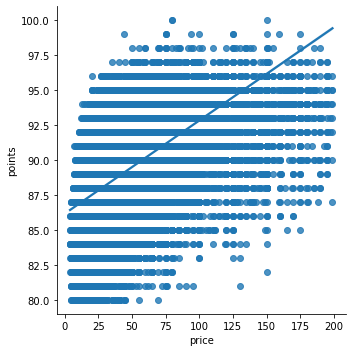

In [22]:
import seaborn as sns
sns.lmplot(y = 'points', x='price', data=df1)

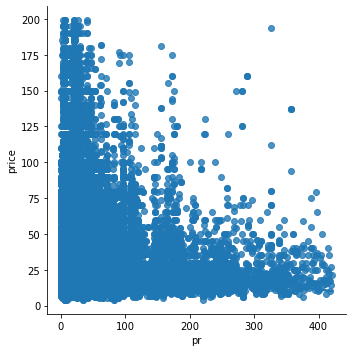

In [24]:
sns.lmplot(y = 'price', x='pr', data=df1)

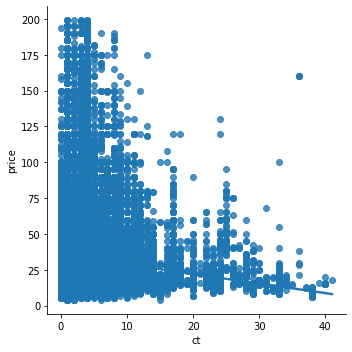

In [28]:
sns.lmplot(y = 'points', x='ct', data=df1)

<h2>Regressive Model</h2>

In [25]:
testing_predictions = model.predict(x_test)
testing_predictions

array([87.73796895, 88.54236257, 90.46620768, ..., 89.14659399,
       87.95531508, 92.15430068])

In [26]:
y_test

67669    86
64266    86
48906    87
6396     89
49789    88
         ..
89942    88
7707     87
41274    93
57830    85
71095    96
Name: points, Length: 36042, dtype: int64

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score
r2_score(y_test, testing_predictions)

0.29722556105299136

In [28]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train,y_train)

y_pred = logit.predict(x_test)
y_pred

array([88, 90, 93, ..., 90, 87, 90])

In [29]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.16497419677043448

<h2>Decision Tree</h2>

In [30]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=10)
clf.fit(X=x_train,y=y_train)

DecisionTreeClassifier(random_state=10)

In [31]:
clf.score(X=x_test, y=y_test)

0.18533932634149047

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth=3)
#model = DecisionTreeRegressor(max_depth = 3)
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

<h2>Sentiment Analysis</h2>

In [110]:
df1.head()

,country,description,points,price,province
0,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro
1,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon
2,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan
3,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon
4,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain


In [111]:
df1['description'] = df1['description'].astype(str).str.lower()
df1.head(3)

,country,description,points,price,province
0,Portugal,"this is ripe and fruity, a wine that is smooth...",87,15.0,Douro
1,US,"tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon
2,US,"pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan


In [35]:
conda install -c anaconda nltk

Solving environment: done

## Package Plan ##

  environment location: /Users/shrutiagarwal/opt/anaconda3

  added / updated specs:
    - nltk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.11.0              |   py39hecd8cb5_1         927 KB
    ruamel.yaml-0.16.12        |   py39h9ed2024_1         180 KB  anaconda
    ruamel.yaml.clib-0.2.6     |   py39hca72f7f_0         138 KB  anaconda
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following NEW packages will be INSTALLED:

  ruamel.yaml        anaconda/osx-64::ruamel.yaml-0.16.12-py39h9ed2024_1 None
  ruamel.yaml.clib   anaconda/osx-64::ruamel.yaml.clib-0.2.6-py39hca72f7f_0 None

The following packages will be UPDATED:

  conda              conda-forge::conda-22.9.0-py39h6e9494~ --> pkgs/main::conda-22.11.0-py39hecd8cb5_1 None

The fol

In [112]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df1['text_token']=df1['description'].apply(regexp.tokenize)
df1.head(3)


,country,description,points,price,province,text_token
0,Portugal,"this is ripe and fruity, a wine that is smooth...",87,15.0,Douro,"[this, is, ripe, and, fruity, a, wine, that, i..."
1,US,"tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,"[tart, and, snappy, the, flavors, of, lime, fl..."
2,US,"pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,"[pineapple, rind, lemon, pith, and, orange, bl..."


In [37]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shrutiagarwal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [113]:
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with your own custom stopwords
my_stopwords = ['https']
stopwords.extend(my_stopwords)

In [114]:
# Remove stopwords
df1['text_token'] = df1['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df1.head(3)

,country,description,points,price,province,text_token
0,Portugal,"this is ripe and fruity, a wine that is smooth...",87,15.0,Douro,"[ripe, fruity, wine, smooth, still, structured..."
1,US,"tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,"[tart, snappy, flavors, lime, flesh, rind, dom..."
2,US,"pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,"[pineapple, rind, lemon, pith, orange, blossom..."


In [115]:
df1['text_string'] = df1['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [116]:
df1[['description', 'text_token', 'text_string']].head()

,description,text_token,text_string
0,"this is ripe and fruity, a wine that is smooth...","[ripe, fruity, wine, smooth, still, structured...",ripe fruity wine smooth still structured firm ...
1,"tart and snappy, the flavors of lime flesh and...","[tart, snappy, flavors, lime, flesh, rind, dom...",tart snappy flavors lime flesh rind dominate g...
2,"pineapple rind, lemon pith and orange blossom ...","[pineapple, rind, lemon, pith, orange, blossom...",pineapple rind lemon pith orange blossom start...
3,"much like the regular bottling from 2012, this...","[much, like, regular, bottling, 2012, comes, a...",much like regular bottling 2012 comes across r...
4,blackberry and raspberry aromas show a typical...,"[blackberry, raspberry, aromas, show, typical,...",blackberry raspberry aromas show typical navar...


In [117]:
all_words = ' '.join([word for word in df1['text_string']])

In [118]:
import nltk
nltk.download('punkt')
tokenized_words = nltk.tokenize.word_tokenize(all_words)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shrutiagarwal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [119]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'wine': 71398, 'flavors': 59859, 'fruit': 45942, 'aromas': 37285, 'palate': 36613, 'finish': 33500, 'acidity': 31282, 'tannins': 27748, 'cherry': 27683, 'drink': 27611, ...})

In [121]:
# fdist.pop("wine")
# fdist.pop("finish")
# fdist.pop("flavors")
fdist.pop("drink")
fdist

FreqDist({'fruit': 45942, 'aromas': 37285, 'palate': 36613, 'acidity': 31282, 'tannins': 27748, 'cherry': 27683, 'black': 26847, 'ripe': 24364, 'red': 20124, 'notes': 18034, ...})

In [122]:
df1['text_string_fdist'] = df1['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))

In [123]:
df1[['description', 'text_token', 'text_string', 'text_string_fdist']].head()

,description,text_token,text_string,text_string_fdist
0,"this is ripe and fruity, a wine that is smooth...","[ripe, fruity, wine, smooth, still, structured...",ripe fruity wine smooth still structured firm ...,ripe fruity smooth still structured firm tanni...
1,"tart and snappy, the flavors of lime flesh and...","[tart, snappy, flavors, lime, flesh, rind, dom...",tart snappy flavors lime flesh rind dominate g...,tart snappy lime flesh rind dominate green pin...
2,"pineapple rind, lemon pith and orange blossom ...","[pineapple, rind, lemon, pith, orange, blossom...",pineapple rind lemon pith orange blossom start...,pineapple rind lemon pith orange blossom start...
3,"much like the regular bottling from 2012, this...","[much, like, regular, bottling, 2012, comes, a...",much like regular bottling 2012 comes across r...,much like regular bottling 2012 comes across r...
4,blackberry and raspberry aromas show a typical...,"[blackberry, raspberry, aromas, show, typical,...",blackberry raspberry aromas show typical navar...,blackberry raspberry aromas show typical navar...


In [53]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shrutiagarwal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/shrutiagarwal/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [124]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

df1['text_string_lem'] = df1['text_string_fdist'].apply(wordnet_lem.lemmatize)

In [125]:
# check if the columns are equal
df1['is_equal']= (df1['text_string_fdist']==df1['text_string_lem'])

In [126]:
# show level count
df1.is_equal.value_counts()

True    120139
Name: is_equal, dtype: int64

In [127]:
df1

,country,description,points,price,province,text_token,text_string,text_string_fdist,text_string_lem,is_equal
0,Portugal,"this is ripe and fruity, a wine that is smooth...",87,15.0,Douro,"[ripe, fruity, wine, smooth, still, structured...",ripe fruity wine smooth still structured firm ...,ripe fruity smooth still structured firm tanni...,ripe fruity smooth still structured firm tanni...,True
1,US,"tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,"[tart, snappy, flavors, lime, flesh, rind, dom...",tart snappy flavors lime flesh rind dominate g...,tart snappy lime flesh rind dominate green pin...,tart snappy lime flesh rind dominate green pin...,True
2,US,"pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,"[pineapple, rind, lemon, pith, orange, blossom...",pineapple rind lemon pith orange blossom start...,pineapple rind lemon pith orange blossom start...,pineapple rind lemon pith orange blossom start...,True
3,US,"much like the regular bottling from 2012, this...",87,65.0,Oregon,"[much, like, regular, bottling, 2012, comes, a...",much like regular bottling 2012 comes across r...,much like regular bottling 2012 comes across r...,much like regular bottling 2012 comes across r...,True
4,Spain,blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,"[blackberry, raspberry, aromas, show, typical,...",blackberry raspberry aromas show typical navar...,blackberry raspberry aromas show typical navar...,blackberry raspberry aromas show typical navar...,True
...,...,...,...,...,...,...,...,...,...,...
120134,Germany,notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel,"[notes, honeysuckle, cantaloupe, sweeten, deli...",notes honeysuckle cantaloupe sweeten delicious...,notes honeysuckle cantaloupe sweeten delicious...,notes honeysuckle cantaloupe sweeten delicious...,True
120135,US,citation is given as much as a decade of bottl...,90,75.0,Oregon,"[citation, given, much, decade, bottle, age, p...",citation given much decade bottle age prior re...,citation given much decade bottle age prior re...,citation given much decade bottle age prior re...,True
120136,France,well-drained gravel soil gives this wine its c...,90,30.0,Alsace,"[well, drained, gravel, soil, gives, wine, cri...",well drained gravel soil gives wine crisp dry ...,well drained gravel soil gives crisp dry chara...,well drained gravel soil gives crisp dry chara...,True
120137,France,"a dry style of pinot gris, this is crisp with ...",90,32.0,Alsace,"[dry, style, pinot, gris, crisp, acidity, also...",dry style pinot gris crisp acidity also weight...,dry style pinot gris crisp acidity also weight...,dry style pinot gris crisp acidity also weight...,True


In [58]:
conda install -c conda-forge wordcloud

Retrieving notices: ...working... done
Solving environment: done

## Package Plan ##

  environment location: /Users/shrutiagarwal/opt/anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1s             |       hfd90126_1         1.6 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.6 MB

The following packages will be UPDATED:

  ca-certificates    anaconda::ca-certificates-2022.4.26-h~ --> conda-forge::ca-certificates-2022.9.24-h033912b_0 
  certifi            anaconda/osx-64::certifi-2022.6.15-py~ --> conda-forge/noarch::certifi-2022.9.24-pyhd8ed1ab_0 
  openssl               anaconda::openssl-1.1.1o-hca72f7f_0 --> conda-forge::openssl-1.1.1s-hfd90126_1 



                                                                               

In [174]:
all_words_lem = ' '.join([word for word in df1['text_string_lem']])

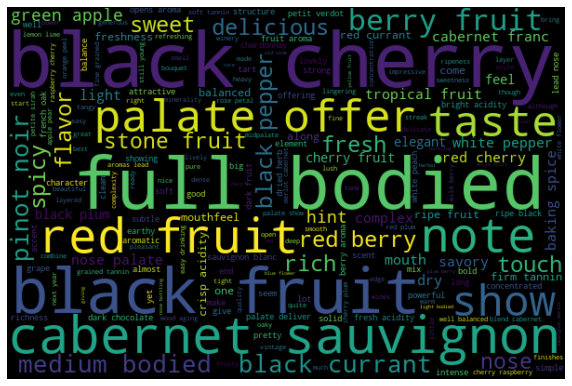

In [175]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [100]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shrutiagarwal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [176]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

In [177]:
fd.most_common(3)

[('fruit', 45942), ('aromas', 37285), ('palate', 36613)]

In [178]:
fd.tabulate(3)

 fruit aromas palate 
 45942  37285  36613 


In [179]:
# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

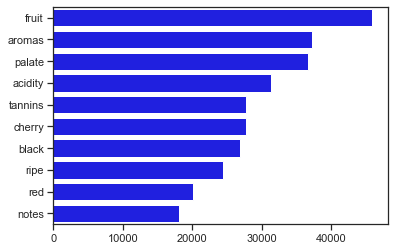

In [180]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');

In [136]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shrutiagarwal/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [68]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [181]:
df1['polarity'] = df1['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
df1.tail(3)

,country,description,points,price,province,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity
120136,France,well-drained gravel soil gives this wine its c...,90,30.0,Alsace,"[well, drained, gravel, soil, gives, wine, cri...",well drained gravel soil gives wine crisp dry ...,well drained gravel soil gives crisp dry chara...,well drained gravel soil gives crisp dry chara...,True,"{'neg': 0.211, 'neu': 0.598, 'pos': 0.191, 'co..."
120137,France,"a dry style of pinot gris, this is crisp with ...",90,32.0,Alsace,"[dry, style, pinot, gris, crisp, acidity, also...",dry style pinot gris crisp acidity also weight...,dry style pinot gris crisp acidity also weight...,dry style pinot gris crisp acidity also weight...,True,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp..."
120138,France,"big, rich and off-dry, this is powered by inte...",90,21.0,Alsace,"[big, rich, dry, powered, intense, spiciness, ...",big rich dry powered intense spiciness rounded...,big rich dry powered intense spiciness rounded...,big rich dry powered intense spiciness rounded...,True,"{'neg': 0.072, 'neu': 0.577, 'pos': 0.351, 'co..."


In [182]:
# Change data structure
df1 = pd.concat(
    [df1.drop(['polarity'], axis=1), 
     df1['polarity'].apply(pd.Series)], axis=1)
df1.head(3)

,country,description,points,price,province,text_token,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound
0,Portugal,"this is ripe and fruity, a wine that is smooth...",87,15.0,Douro,"[ripe, fruity, wine, smooth, still, structured...",ripe fruity wine smooth still structured firm ...,ripe fruity smooth still structured firm tanni...,ripe fruity smooth still structured firm tanni...,True,0.000,0.773,0.227,0.6486
1,US,"tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,"[tart, snappy, flavors, lime, flesh, rind, dom...",tart snappy flavors lime flesh rind dominate g...,tart snappy lime flesh rind dominate green pin...,tart snappy lime flesh rind dominate green pin...,True,0.097,0.903,0.000,-0.1280
2,US,"pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,"[pineapple, rind, lemon, pith, orange, blossom...",pineapple rind lemon pith orange blossom start...,pineapple rind lemon pith orange blossom start...,pineapple rind lemon pith orange blossom start...,True,0.000,0.893,0.107,0.3400


In [183]:
# Create new variable with sentiment "neutral," "positive" and "negative"
df1['sentiment'] = df1['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df1.head(4)

,country,description,points,price,province,text_token,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound,sentiment
0,Portugal,"this is ripe and fruity, a wine that is smooth...",87,15.0,Douro,"[ripe, fruity, wine, smooth, still, structured...",ripe fruity wine smooth still structured firm ...,ripe fruity smooth still structured firm tanni...,ripe fruity smooth still structured firm tanni...,True,0.000,0.773,0.227,0.6486,positive
1,US,"tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,"[tart, snappy, flavors, lime, flesh, rind, dom...",tart snappy flavors lime flesh rind dominate g...,tart snappy lime flesh rind dominate green pin...,tart snappy lime flesh rind dominate green pin...,True,0.097,0.903,0.000,-0.1280,negative
2,US,"pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,"[pineapple, rind, lemon, pith, orange, blossom...",pineapple rind lemon pith orange blossom start...,pineapple rind lemon pith orange blossom start...,pineapple rind lemon pith orange blossom start...,True,0.000,0.893,0.107,0.3400,positive
3,US,"much like the regular bottling from 2012, this...",87,65.0,Oregon,"[much, like, regular, bottling, 2012, comes, a...",much like regular bottling 2012 comes across r...,much like regular bottling 2012 comes across r...,much like regular bottling 2012 comes across r...,True,0.000,0.712,0.288,0.8176,positive


<AxesSubplot:title={'center':'Sentiment towards wine by Country'}, xlabel='country'>

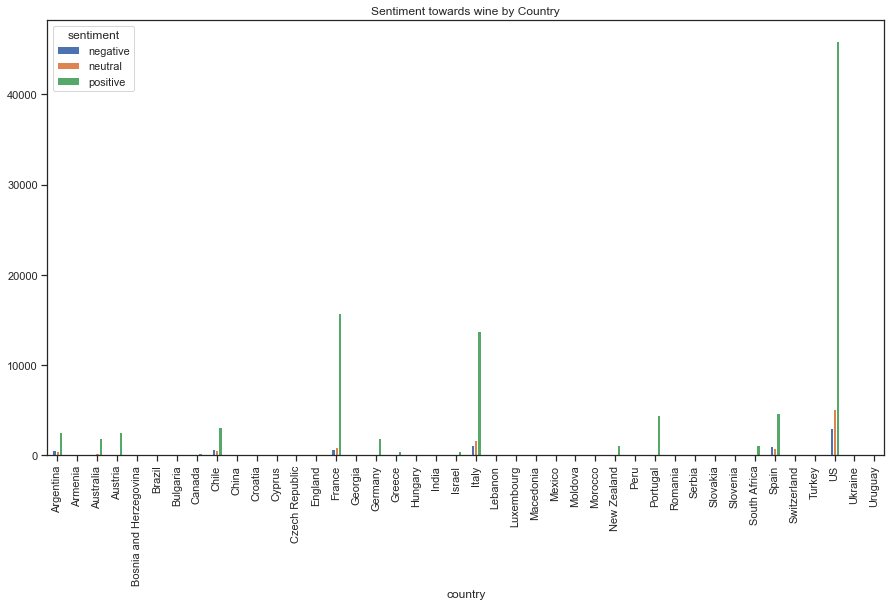

In [230]:
Count = df1.groupby(['country', 'sentiment'])
Count.size().unstack().plot(kind='bar', title = "Sentiment towards wine by Country", figsize=(15,8))

People have a positive sentiment towards wine in all the countries

In [184]:
import numpy as np
from sklearn.linear_model import LinearRegression
x = np.array(df1['compound']).reshape((-1,1))
y = np.array(df1['points'])
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [185]:
r_sq = model.score(x, y)
r_sq

0.09404096020396036

In [186]:
intercept = model.intercept_
intercept

87.02300347994989

In [187]:
slope = model.coef_
slope

array([2.55526919])

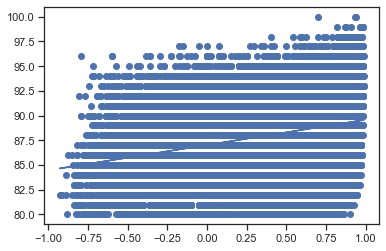

In [188]:
def myfunc(x):
      return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

Note: Plot a hist/bar graph. Group by Country and sentiment the count of wines and show for top 10.

In [189]:
y_pred = model.predict(x)
y_pred

array([88.68035108, 86.69592902, 87.89179501, ..., 87.35007794,
       88.36886376, 88.8124585 ])